## 4 - Exploratory Data Analysis and Preprocessing

### 4.0 - Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
from nltk.corpus import stopwords

from nltk.tokenize import RegexpTokenizer
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string

from tqdm import tqdm

%matplotlib inline

In [4]:
# Set max columns and width with pandas
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 500)

In [6]:
# Clear future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
df = pd.read_csv('../clean_data/corpus.csv')

In [8]:
df.head(1)

,company,security,gics_sector,gics_sub_industry,release_date,corpus,tokens,length_corpus,items,stock_change,index_change,normalized_change,vix,hist_week,hist_month,hist_quarter,hist_year,movement
0,CSCO,Cisco Systems,Information Technology,Communications Equipment,2019-08-22 16:35:32,|Form 8-K UNITED STATES SECURITIES AND EXCHANG...,"['Form', '8', 'K', 'UNITED', 'STATES', 'SECURI...",3233,['Item8.01'],-0.005812,-0.004064,-0.001747,16.68,0.054486,-0.138644,-0.089602,0.059757,neutral


In [9]:
df.shape

(56911, 18)


## `4.1 - EDA ( Exploratory Data Analysis )`
---

In [10]:
plt.style.use('seaborn-whitegrid')

### 4.1.1 - GICS Sector and Sub-Industry
> _The Global Industry Classification Standard (GICS) is an industry taxonomy developed in 1999 by MSCI and Standard & Poor's (S&P) for use by the global financial community. The GICS structure consists of 11 sectors, 24 industry groups, 69 industries and 158 sub-industries[1] into which S&P has categorized all major public companies. The system is similar to ICB (Industry Classification Benchmark), a classification structure maintained by FTSE Group._ [Learn More](https://en.wikipedia.org/wiki/Global_Industry_Classification_Standard)

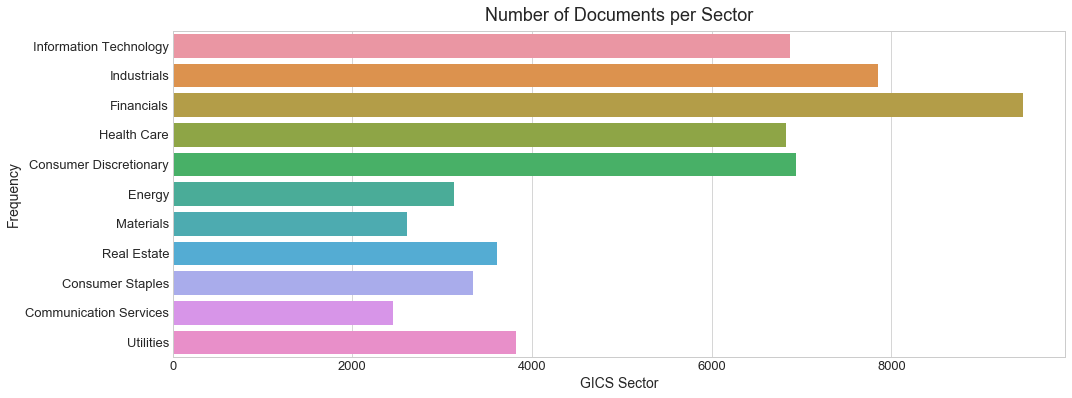

In [11]:
plt.figure(figsize=(16,6))
sns.countplot(y=df['gics_sector']);
plt.xticks(size=13)
plt.xlim(0)
plt.xlabel('GICS Sector', size=14)
plt.yticks(size=13)
plt.ylabel('Frequency', size=14)
plt.title('Number of Documents per Sector', size=18, pad=10);

In [12]:
def count_plot(df, feat, ncol=2):
    nrow = int(np.ceil(len(feat)/ncol))
    plt.figure(figsize=(15, 30))
    for i, sector in enumerate(feat):
        plt.subplot(nrow,ncol,i+1)
        sns.countplot(y=df[df['gics_sector']==sector]['gics_sub_industry'])
        plt.title(sector, size=16)
        plt.xlabel('Number of Documents', size=13)
        plt.ylabel("")
        plt.yticks(size=13)
        plt.tight_layout();

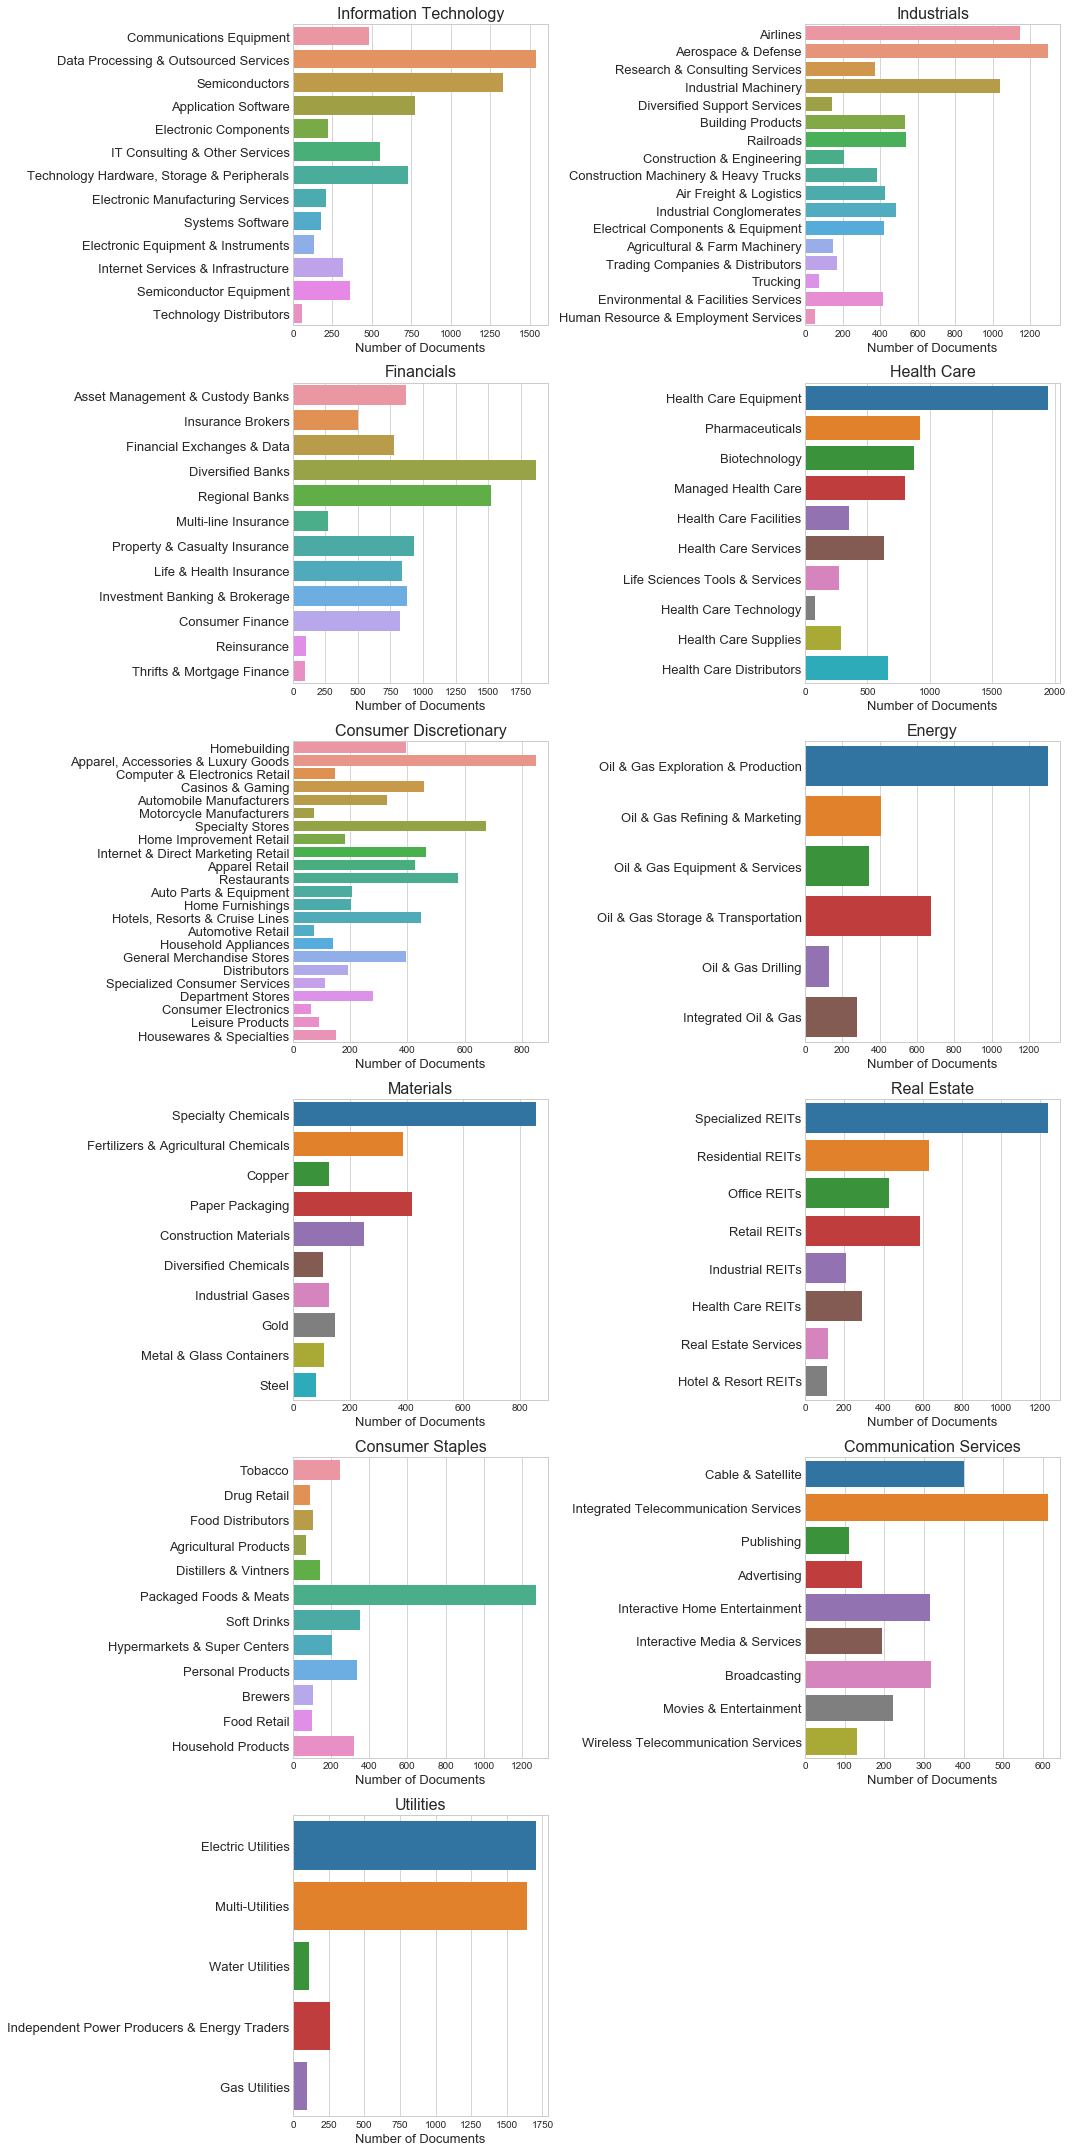

In [13]:
count_plot(df, df['gics_sector'].unique())

### 4.1.2 - Corpus Lenght

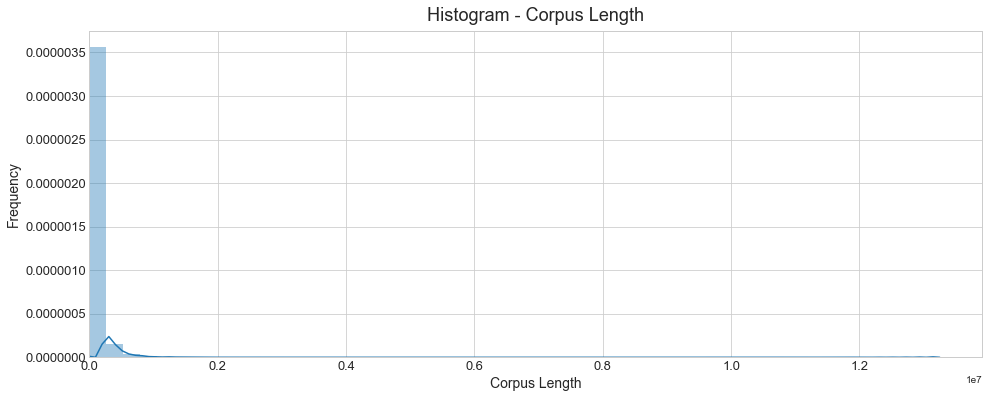

In [14]:
plt.figure(figsize=(16,6))
sns.distplot(df['length_corpus'])
plt.xticks(size=13)
plt.xlim(0)
plt.xlabel('Corpus Length', size=14)
plt.yticks(size=13)
plt.ylabel('Frequency', size=14)
plt.title('Histogram - Corpus Length', size=18, pad=10);

### 4.1.4 - Stock Price Movements

In [15]:
df['movement'].value_counts(normalize=True)

neutral    0.667006
up         0.170160
down       0.162833
Name: movement, dtype: float64

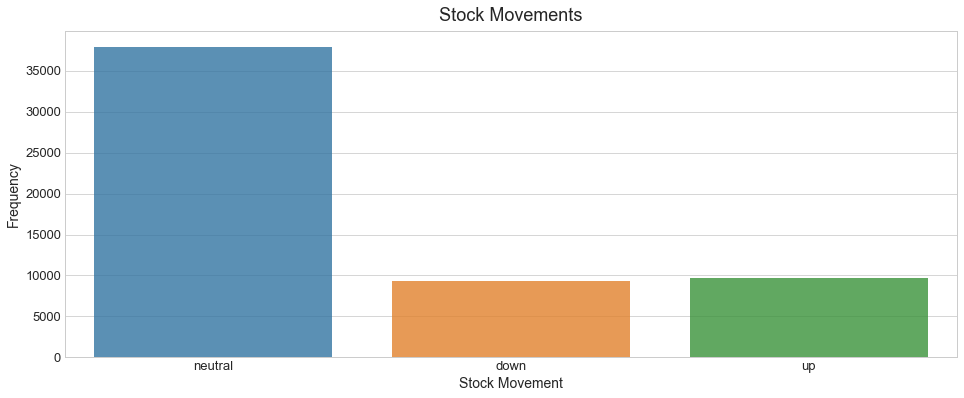

In [16]:
plt.figure(figsize=(16,6))
sns.countplot(df['movement'], alpha=.8)

plt.xticks(size=13)
plt.xlabel('Stock Movement', size=14)

plt.yticks(size=13)
plt.ylabel('Frequency', size=14)

plt.title('Stock Movements', size=18, pad=10);

### 4.1.5 Documents Release Date

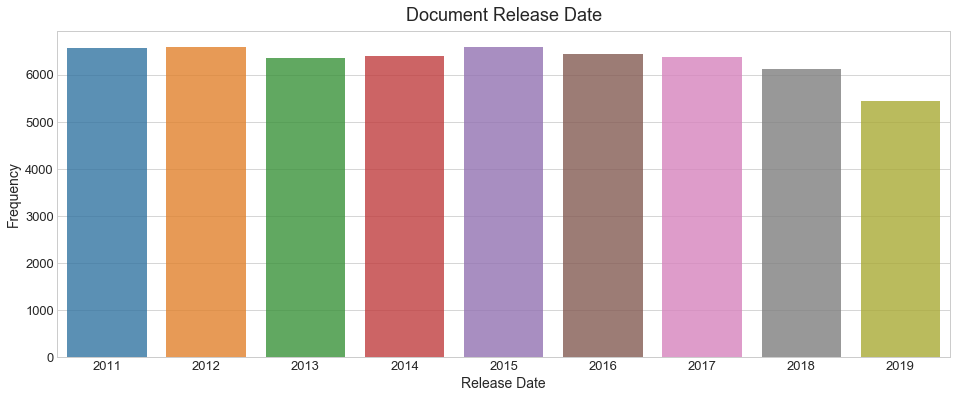

In [17]:
plt.figure(figsize=(16,6))
sns.countplot(pd.DatetimeIndex(df['release_date']).year, alpha=.8)

plt.xticks(size=13)
plt.xlabel('Release Date', size=14)

plt.yticks(size=13)
plt.ylabel('Frequency', size=14)

plt.title('Document Release Date', size=18, pad=10);

In [18]:
df.head(1)

,company,security,gics_sector,gics_sub_industry,release_date,corpus,tokens,length_corpus,items,stock_change,index_change,normalized_change,vix,hist_week,hist_month,hist_quarter,hist_year,movement
0,CSCO,Cisco Systems,Information Technology,Communications Equipment,2019-08-22 16:35:32,|Form 8-K UNITED STATES SECURITIES AND EXCHANG...,"['Form', '8', 'K', 'UNITED', 'STATES', 'SECURI...",3233,['Item8.01'],-0.005812,-0.004064,-0.001747,16.68,0.054486,-0.138644,-0.089602,0.059757,neutral



## `4.2 Preprocessing`
---

#### Multilabel `Items` Column

In [19]:
def eval_literal(list_words):
    try:
        return ast.literal_eval(list_words)  
    except ValueError:
        return ast.literal_eval(str(list_words))  

In [20]:
# Items from list of strings to literal - ''
df['items'] = df['items'].progress_map(eval_literal)

#### 5.8.4 - Remove Stopwords and Punctuation

In [21]:
stop_words = list(set(stopwords.words("english") + list(ENGLISH_STOP_WORDS)))
punctuation = string.punctuation

In [22]:
df.head(1)

,company,security,gics_sector,gics_sub_industry,release_date,corpus,tokens,length_corpus,items,stock_change,index_change,normalized_change,vix,hist_week,hist_month,hist_quarter,hist_year,movement
0,CSCO,Cisco Systems,Information Technology,Communications Equipment,2019-08-22 16:35:32,|Form 8-K UNITED STATES SECURITIES AND EXCHANG...,"['Form', '8', 'K', 'UNITED', 'STATES', 'SECURI...",3233,[Item8.01],-0.005812,-0.004064,-0.001747,16.68,0.054486,-0.138644,-0.089602,0.059757,neutral


In [23]:
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['corpus'] \
.progress_map(lambda x: [lemmatizer.lemmatize(word) for word in x.lower().replace('|', '').split() \
                         if word not in stop_words and word not in punctuation])

In [24]:
df['processed_text'] = df['tokens'].progress_map(lambda x: ' '.join(x))

In [25]:
df['length_corpus'] = df['tokens'].map(len)

In [26]:
df.head(1)

,company,security,gics_sector,gics_sub_industry,release_date,corpus,tokens,length_corpus,items,stock_change,index_change,normalized_change,vix,hist_week,hist_month,hist_quarter,hist_year,movement,processed_text
0,CSCO,Cisco Systems,Information Technology,Communications Equipment,2019-08-22 16:35:32,|Form 8-K UNITED STATES SECURITIES AND EXCHANG...,"[form, 8-k, united, state, security, exchange,...",337,[Item8.01],-0.005812,-0.004064,-0.001747,16.68,0.054486,-0.138644,-0.089602,0.059757,neutral,form 8-k united state security exchange commis...


In [27]:
df.drop(columns=['corpus', 'tokens'], axis=1, inplace=True)

In [28]:
df.head(1)

,company,security,gics_sector,gics_sub_industry,release_date,length_corpus,items,stock_change,index_change,normalized_change,vix,hist_week,hist_month,hist_quarter,hist_year,movement,processed_text
0,CSCO,Cisco Systems,Information Technology,Communications Equipment,2019-08-22 16:35:32,337,[Item8.01],-0.005812,-0.004064,-0.001747,16.68,0.054486,-0.138644,-0.089602,0.059757,neutral,form 8-k united state security exchange commis...


In [32]:
df.to_csv('../clean_data/modeling.csv', index_label=False)